#### Not all Latex writing seem to work in the VS Code extension of Jupyter, be aware...

## Defining a Unitary

$ U_{\varphi }( \varphi_{0}, \varphi_{1} ) = 
\begin{pmatrix} 
    e^{i  2 \pi \varphi_{0}} & 0\\
    0 & e^{i  2 \pi \varphi_{1}} 
\end{pmatrix}
\;\;\;\;
\left\{
    \begin{array}\\
        |\psi_0 \rangle = \begin{pmatrix} 1\\ 0 \end{pmatrix}\;\;\; \mathrm{Eigenphase}: \varphi_0\\
        |\psi_1 \rangle = \begin{pmatrix} 0\\ 1 \end{pmatrix}\;\;\; \mathrm{Eigenphase}: \varphi_1 \\
    \end{array}
\right.
$

In [1]:
from QPE.Unitary import Unitary
from QPE.HelpFunctions import phase_to_exp
import numpy as np

def U_phi(phi_0, phi_1):
    diag_elems = phase_to_exp([phi_0, phi_1])
    matrix = np.diag(diag_elems)
    U_phi = Unitary(matrix)
    return U_phi

### Defining our eigenphases & Constructing U
$
\mathrm{Let} \left\{
    \begin{array}\\
        \varphi_0 = 0.5625 = 0.1001_{2}\\
        \varphi_1 = 0.578125 = 0.100101_{2}
    \end{array}
\right.
$

In [2]:
from QPE.HelpFunctions import bin_to_float

b_0 = "1001"
b_1 = "100101"
phi_0 = bin_to_float(b_0)
phi_1 = bin_to_float(b_1) 

print(f"Bitstring b_0 = {b_0}\t correspond to phi_0 = {phi_0}")
print(f"Bitstring b_1 = {b_1}\t correspond to phi_1 = {phi_1}")

U = U_phi(phi_0, phi_1)

Bitstring b_0 = 1001	 correspond to phi_0 = 0.5625
Bitstring b_1 = 100101	 correspond to phi_1 = 0.578125


## Constructing the PhaseEstimator

**Algorithm:** Quantum Fourier Transform 

**Unitary:** The Unitary $U_{\varphi}$ constructed above

**Digits of precision:** 4

**Backend:** My local machine (*No time to wait for hardware*)⌛️⌛️⌛️

In [3]:
from QPE.QFT import QFT

n_digits = 4
backend_params = {"service":"local"}
N_states = 2

PE = QFT(U, n_digits, N_states = N_states, backend_params = backend_params)

## Running the algorithm

In [4]:
PE.run_circuit()
PE.post_process()

Job done


## Plotting results
*Remember,* $ \varphi_0$ *is representable by 4 digits, but* $ \varphi_1$ *is not ...*

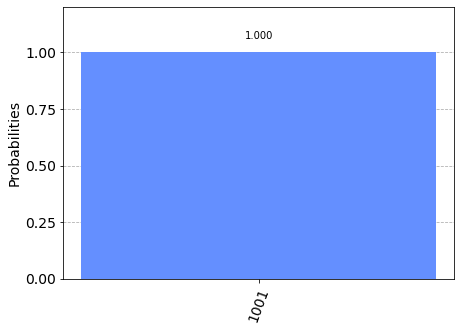

In [5]:
PE.plot_histograms(0)

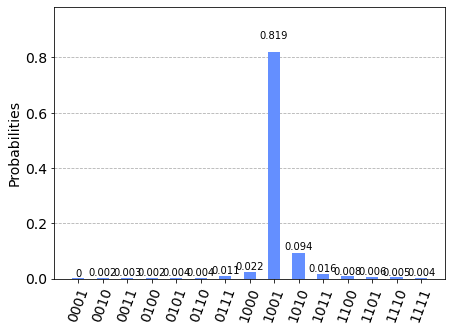

In [6]:
PE.plot_histograms(1)

## Exporting experiment data
We can export this class object to a json file with the **dump_to_json()**-method

In [7]:
PE.dump_to_json("example_experiment_simulation.json")

Data saved to directory example_experiment_simulation_state0.json
Data saved to directory example_experiment_simulation_state1.json


## Data from an earlier experiment
Before the presentation, the same experiment for $\varphi_1$ was run on the IBMQ hardware

Let us view these results

In [8]:
from QPE.UnpackData import unpack_PE_from_json
hardware_path = "example_experiment_hardware.json"
hardware_PE = unpack_PE_from_json(hardware_path)

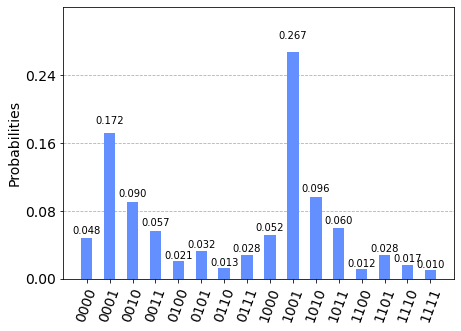

In [9]:
hardware_PE.plot_histograms(0)

#### Want to try yourself?

Download the repository from https://github.com/hjaleta/QPE

or simply

`pip install QPE`

*NOTE: qiskit and quantuminspire are required*